# Beräkning av Fourier serier


## Kommandot fourier_series

Det grundläggande kommandot har formen fourier_series(funktion, (variabel, nedre, övre)). Kommandona finns i sympy.

sympy.series.fourier.fourier_series(f, limits=None, finite=True). Detta innebär att vi skriver `from sympy import fourier_series` och sedan anropar denna med just `fourier_series`. Vi behöver inte de andra sakerna i sympy.series.fourier.

**Länk till jupyter där du kan testa egen kod https://jupyter.org/try ty ipywidgets fungerar inte på replit.com.**


Vi ber om fourierserien för $f(x)=x^2$.


In [8]:
from sympy import fourier_series, pi
from sympy.abc import x  # Importerar x som en symbol

f = x**2  # Funktionen uttryckt symboliskt

s = fourier_series(f, (x, -pi, pi))  # Beräkna fourier serien symboliskt

s1 = s.truncate(n=5)  # Antal termer

print(s1)

# Kan få snygga utskrifter i Jupyter
s1

-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + cos(4*x)/4 + pi**2/3


-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + cos(4*x)/4 + pi**2/3

Widgets kan användas för att styra antalet termer. Vi använder glidare. Dra med musen eller klicka och använd piltangenter.

In [1]:
from sympy import fourier_series, pi
from sympy.abc import x

from ipywidgets import interact

def g(N):
    f = x**2  # Funktionen
    s = fourier_series(f, (x, -pi, pi))  # Beräkna fourier serien
    s1 = s.truncate(N)
    print(s1)
    return N


interact(g, N=(1,6))

interactive(children=(IntSlider(value=3, description='N', max=6, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.g(N)>

Och vi vill naturligtvis rita fourierserien för att se anpassningen.

In [3]:
from sympy import fourier_series, pi
from sympy.abc import x
from sympy.plotting import plot  # Vi plottar med sympy.
from ipywidgets import interact


def g(N):
    f = x**2  # Funktionen
    s = fourier_series(f, (x, -pi, pi))  # Beräkna fourier serien
    s1 = s.truncate(N)
    print(s1)
    
    plot(f,s1, (x,-4,4))  # Plottar både f och s1
   
    return N


interact(g, N=(1,8))

interactive(children=(IntSlider(value=4, description='N', max=8, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.g(N)>

## Serier allmänt

Om man beräknat ett uttryck för en fourier-serie så kan sympy förstå formeln och beräkna summan upp till ett visst antal termer; det görs med list-förståelse (list comprehension). Detta kan användas för att kontrollera att en viss föreslagen fourier-serie är rimlig och i alla fall för ögat syns konvergera mot önskad funktion. 

Om vi har en serie som ges av uttrycket 

$$
\frac{1}{2}-\sum_{n=1}^{\infty}\frac{1}{\pi n}\sin\left(2\pi nx\right)
$$

som approximerar en sågtandad våg så kan vi 'se' hur bra det ser ut.

Vi använder kommandot `summation(f, [i,a,b])`. Vi anger funktionen f, indexet är i, gränserna är a respektive b. Summationen är symbolisk men man kan skriva plot och sympy tar hand om omvandlingen.

-(sin(2*pi*x) + sin(4*pi*x)/2 + sin(6*pi*x)/3 + sin(8*pi*x)/4 + sin(10*pi*x)/5 + sin(12*pi*x)/6)/pi + 0.5


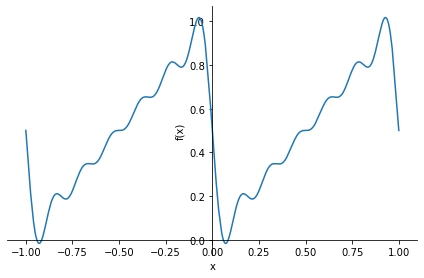

In [11]:
from sympy import summation, symbols, cos, sin, pi
from sympy.plotting import plot


# I sympy måste vi noga ange det som ska vara symboler
i = symbols('i', integer=True)  # Symboler för heltal
x = symbols('x')  # Behöver lite fler symboler


# Här följer den summa av fouriertermer jag vill beräkna, se ovan. Satt summan från 1 till 6.
SF=1/2-summation(1 / (pi*i) * sin(2*pi*i*x), [i, 1, 6])

print(SF)

plot(SF,(x,-1,1))


## Fourier och Taylor

Didaktiskt kan det vara värt att jämföra Taylorutveckling med Fourier-serie. Vi behöver importera `series` från sympy för att göra Taylorutveckling.


`series(cos(x),x)` ger utvecklingen av cosinus kring 0, variabeln är x.


`series(cos(x),x,x0=2,n=9)` ger utvecklingen kring 2 och med 9 termer. Förinställt är utveckling kring 0 och n=6.


Vi väljer i exemplet nedan att utgå från $f(x)=e^x$.

In [2]:
from sympy import fourier_series, pi, series, simplify
from sympy.abc import x
from sympy.functions import exp
from sympy.plotting import plot

from ipywidgets import interact


def g(N=2,M=2):
    f = exp(x)  # Funktionen
    
    # Fourier
    s = fourier_series(f, (x, -2, 2)).truncate(N)  # Beräkna fourier serien
    ss = simplify(s)  # Hjälper ibland
    print("s= ", s,"\n")  # Kontroll
    print("ss= ", ss,"\n")  # Kontroll
    
    # Taylor
    r = series(f,x,x0=0,n=M).removeO()  # Beräkna Taylor serien; ta bort resttermen
    print("r= ", r)  # Kontroll
    
    # Plot
    plt = plot(f,s,r,(x,-2,2),show = False)
    plt[0].label = "$exp(x)$"  # De olika graferna nås med index
    plt[1].label = "$N\, Fourier$"  # Observera LaTeX
    plt[2].label = "$M\, Taylor$"
    
    plt[0].line_color = "r"
    plt[1].line_color = "b"
    plt[2].line_color = "g"
    plt.legend = True
    plt.show()
    return N,M


interact(g, N=(2,8), M=(2,8))

interactive(children=(IntSlider(value=2, description='N', max=8, min=2), IntSlider(value=2, description='M', m…

<function __main__.g(N=2, M=2)>

## Uppgifter

**Uppgift 1**
Plotta delsummor för olika n. Vilken funktion är det som återskapas? Använd kommandot summation såsom illustrerats.


$$
\sum_{n=0}^{N}\:\frac{4}{\pi\left(2n+1\right)}\sin\left(\left(2n+1\right)x\right)
$$

[Lösningsexempel](./uppg/fourier1Uppgift1.ipynb)

**Uppgift 2**

Stegfunktionen heter Heaviside(). Se exempel i nästa cell.


0
0
0
0
0
1/2
1
1
1
1


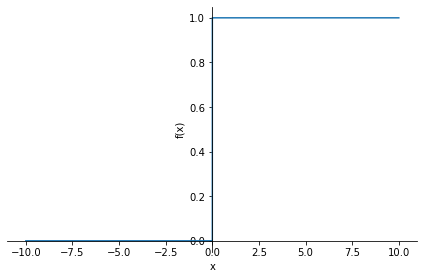

In [15]:
from sympy import Heaviside, nan
from sympy.abc import x

for i in range(-5,5):
    print(Heaviside(i))

plot(Heaviside(x))  # plotkommando i sympy

Plotta Heaviside, fyrkantfunktionen och en sinus gånger fyrkantsfunktionen.
Du måste ha:
    
```
from sympy import Heaviside, nan, symbols, sin
from sympy.abc import x
from sympy.plotting import plot
```

Ange fönstret med a respektive b. Fyrkant ska konstrueras från Heaviside. Gör en def för varje funktion, 3 stycken.

[Lösningsförslag](./uppg/fourier1Uppgift2.ipynb)

**Uppgift 3**

Att plotta ett spektrum innebär att man plottar fourierkoefficienterna i en graf. Man har då vinkelfrekvensen på x-axeln eller multipel av grund-vinkelfrekvensen och amplituden/koefficienten på y-axeln.

För att få ut termerna (inte koefficienterna) kan man skriva

```
cosout = []
    cosout.append(s.a0)
    for i in range(1,N):
        cosout.append(s.an.coeff(i))
    print(cosout)
```


Där s i koden är från typiskt `s = fourier_series(f, (x, -pi, pi))`. 


Förhållandet mellan termer och koefficienter kan kännas lite förvirrande. Termerna, tex. $\frac{5}{3}\sin(2\pi x)$ måste skiljas från koefficienten som är $\frac{5}{3}$


För att få ut termerna används en metod: s.a0 ger $a_0$ termen. s.an.coeff(i) ger de andra termerna. Lägger allt i en lista cosout. Termerna för sinus ges av s.b0 samt s.bn.coeff(i). N anger antalet termer (tex. via glidare). Metoden .coeff(i) ger termen inte koefficient som man skulle kunna tro.

Sedan måste man se till att  sinus respektive cosinus är 1 för att få ut koefficienterna. Det kan man göra genom att se till att cosinus respektive sinusfunktionerna ger värdet 1: `cosout.append(s.an.coeff(i).subs(x,0))` för cosinus. 


subs(x,0) innebär att symbolen x ersätts med talet 0. Hur gör man för sinus?



Plotta spektrum för $y=x^2+x$

I lösningsförslaget är spektrum plottat med matplotlib.pyplot men fourierseriens delsummor med sympy.


[Lösningsförslag](./uppg/fourier1Uppgift3.ipynb)